## Amazon Fine Food Review Assignment 
This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

1. Number of reviews : 568,454
2. Number of Users : 256,059
3. Number of Products : 74,258
4. TimeSpan : Oct 1999 - Oct 2012
5. Number of Attribute/Column in the data : 10

Attributes :
1.  Id
2.  Product Id : Unique identifier for the product
3.  User Id : Unique indentifier for the user
4.  Profile Name 
5.  HelpfulnessNumerator : Number of users who found the reviews helpful
6.  HelpfulnessDenominator : Number of users who indicated whether they found the review helpful or
    not.
7.  Score : Rating between 1 and 5
8.  Time : Timestamp for the review
9.  Summary : Brief explanation of the review 
10. Text : Text for the review

Objective/Classification :
Given a review , determine whether the review is positive(Rating 4 or 5) or Negative(Rating 1 or 2).

### Loading the Data :
The Dataset is available in 2 forms:
1. .CSV File
2. SQLite Database

In order to load the data , we have using SQLite dataset as it is easier to query and visualize the data efficiently. 

In [4]:
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk

con=sqlite3.connect('C:/Python Projects/Amazon Fine Food Review/amazon-fine-food-reviews/database.sqlite')
filtered_data = pd.read_sql_query("""SELECT * FROM Reviews WHERE Score !=3 """,con)
filtered_data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


Observations : Load the data from SQLite and fetch only those data whose Score is not 3 in "filtered_data" and display the First 3 entries

In [5]:
def partition(x) :
    if x < 3:
        return 'negative'
    return 'positive'

actual_score=filtered_data['Score']
reviews_postive_negative=actual_score.map(partition)
filtered_data['Score'] = reviews_postive_negative
filtered_data.shape

(525814, 10)

Observations :

1. Assign the entire "Score" Column in "actual_score" variable.
2. If Score is less than 3 , assign "negative" Value and if it's greater than 3 , assign "Positive" value.
3. Datapoint = (525814,10). It means dataset has 525814 rows and 10 Columns.

In [6]:
filtered_data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


Observations : Display the first 3 rows to make sure whether "Score" column returned "positive" & "negative".

In [7]:
duplicate_entries=pd.read_sql_query("""
SELECT * FROM Reviews WHERE Score !=3 AND UserId = "AR5J8UI46CURR" ORDER BY ProductId
""",con)
duplicate_entries.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


Observations : It is observed that the reviews data had many duplicate entries.Hence it was necessary to remove duplicates in order to get unbiased results for the analysis of the data.

In [8]:
sorted_data=filtered_data.sort_values('ProductId',axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last')
sorted_data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...


Observations : 
1. By using "ascending = True" , the entries get sorted in "Ascending" order.
2. Displayed first 3 entries.

In [9]:
final_data=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep='first',inplace=False)
print(final_data.shape)

(364173, 10)


Observations : 
1. Since there was Duplicate entries in dataset , we removed the entries which are duplicate and return the Final Data.
2. Datapoint = (364173,10). It means dataset has 364173 rows and 10 Columns.

In [11]:
(final_data['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

69.25890143662969

Observations : 69% of the data remains after removing the duplicates.

In [12]:
final_data = final_data[final_data.HelpfulnessNumerator<=final_data.HelpfulnessDenominator]
final_data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...


Observations: 

1. It is impossible that "HelpfulnessNumerator" is greater "HelpfulnessDenominator". Hence removed the entries which occur like
   this & assign in "final_data" variable.
2. Display first 3 rows of "final_data"

In [13]:
print(final_data.shape)
final_data['Score'].value_counts()

(364171, 10)


positive    307061
negative     57110
Name: Score, dtype: int64

Observations : 
1.  After Filter , Datapoint = (364171,10). It means dataset has 364173 rows and 10 Columns.
2. There are total 307061 entries that are "Positive" and 57110 that are "Negative".

In [14]:
import re
import seaborn as sn
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from nltk.stem.porter import PorterStemmer
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt

stopping_words = set(stopwords.words('english'))
print(stopping_words)

{'as', 'needn', 'her', 'to', 'or', 'who', 'on', 'each', 're', 'i', 'doesn', 'wasn', 'my', "won't", 'before', "you've", 'them', 'once', 'didn', "isn't", 'won', 'further', 'no', "shan't", 'mustn', 'haven', 'she', "doesn't", 'don', 'his', 'few', "couldn't", 'above', 'until', 'then', 'does', 'couldn', 'both', 'ain', 'hers', 'where', 'more', "don't", 'only', 've', 'in', "wouldn't", 'how', 'an', 'you', 'by', 'during', 'whom', 'below', "it's", 'been', 'being', 'again', 'off', 'yourself', 'if', 'at', "you'll", "hasn't", 'and', 'yourselves', 'myself', 'has', 'very', 'aren', "haven't", "you're", 'some', 'through', 'doing', 'yours', 'about', 'their', 'he', 'because', 'own', 'have', 'him', 'can', 'your', 'which', 'while', 'so', 'from', 'all', "you'd", 'himself', 'with', 'down', 'should', 'the', 'when', 'y', 'our', 'a', 'of', 'nor', 'ours', 'its', 'did', 'hadn', 'but', 'over', 'were', 'are', 'such', 'be', 'shouldn', 'under', 'too', 'they', 'do', 't', 'will', "mightn't", 'those', 'isn', 'there', 'mi

Observations : 
1. Imported all the necessary packages.
2. Display all the English Stopping words.

In [15]:
def clean_html(text):
    clean_r = re.compile('<,*?>')
    clean_text = re.sub(clean_r,'',text)
    return clean_text

def Clean_punc(text):
    clean_sentence = re.sub(r'[?|!|\'|"|#]',r' ',text)
    clean_data = re.sub(r'[.|,|)|(|\|/)]',r' ',clean_sentence)
    return clean_data

Function will remove the HTML tags <> & Puncutation marks from the text.

In [16]:
from tqdm import tqdm
import os
import pdb
import pickle

stem_no = nltk.stem.SnowballStemmer('english')

if not os.path.isfile('final_data.sqlite'):
    final_string=[]
    all_positive_words=[]
    all_negative_words=[]
    for i,sentence in enumerate(tqdm(final_data['Text'].values)):
        filtered_sentence=[]
        sent_without_html_tags=clean_html(sentence)
        #pdb.set_trace()
        for w in sent_without_html_tags.split():
            for cleaned_words in Clean_punc(w).split():
                if ((cleaned_words.isalpha()) & (len(cleaned_words) > 2)):
                    if(cleaned_words.lower() not in stopping_words) :
                        stemming=(stem_no.stem(cleaned_words.lower())).encode('utf8')
                        filtered_sentence.append(stemming)
                        if(final_data['Score'].values)[i]=='positive':
                            all_positive_words.append(stemming)
                        if(final_data['Score'].values)[i]=='negative':
                            all_negative_words.append(stemming)
        str1 = b" ".join(filtered_sentence)
        final_string.append(str1)
        
    final_data['Cleaned_text']=final_string
    final_data['Cleaned_text']=final_data['Cleaned_text'].str.decode("utf-8")
    
    conn = sqlite3.connect('final_data.sqlite')
    cursor=conn.cursor
    conn.text_factory = str
    final_data.to_sql('Reviews',conn,schema=None,if_exists='replace',index=True,index_label=None,chunksize=None,dtype=None)
    conn.close()
    
    
    with open('positive_words.pkl','wb') as f :
        pickle.dump(all_positive_words,f)
    with open('negative_words.pkl','wb') as f :
        pickle.dump(all_negative_words,f)

100%|██████████| 364171/364171 [06:15<00:00, 970.99it/s] 



Observation : 
1. We have called 2 function named Clean_html() & Clean_punc() to remove the html tag and any punctionation marks from the Text.
2. Traversed through all the 364171 rows and created new column(Named Cleaned_text) that contains Clear Text without any special    characters , Html tags and Stopping words.
3. Dumped the final data in "final_data.sqlite"

In [17]:
final_data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...


Observations : 
1. New Column name "Cleaned_text" has been created that will contain the text that doesnt have special characters , applied Snow    Stemmer, No Stopping Words etc.
2. Put all the Positive words in seperate variable "all_positive_words" and all negative words in  "all_negative_words".

In [18]:
all_positive_words

[b'witti',
 b'littl',
 b'book',
 b'make',
 b'son',
 b'laugh',
 b'loud',
 b'recit',
 b'car',
 b'drive',
 b'along',
 b'alway',
 b'sing',
 b'refrain',
 b'learn',
 b'whale',
 b'india',
 b'droop',
 b'love',
 b'new',
 b'word',
 b'book',
 b'introduc',
 b'silli',
 b'classic',
 b'book',
 b'will',
 b'bet',
 b'son',
 b'still',
 b'abl',
 b'recit',
 b'memori',
 b'colleg',
 b'grew',
 b'read',
 b'sendak',
 b'book',
 b'watch',
 b'realli',
 b'rosi',
 b'movi',
 b'incorpor',
 b'love',
 b'son',
 b'love',
 b'howev',
 b'miss',
 b'hard',
 b'cover',
 b'version',
 b'paperback',
 b'seem',
 b'kind',
 b'flimsi',
 b'take',
 b'two',
 b'hand',
 b'keep',
 b'page',
 b'open',
 b'fun',
 b'way',
 b'children',
 b'learn',
 b'month',
 b'year',
 b'learn',
 b'poem',
 b'throughout',
 b'school',
 b'year',
 b'like',
 b'handmot',
 b'invent',
 b'poem',
 b'great',
 b'littl',
 b'book',
 b'read',
 b'nice',
 b'rhythm',
 b'well',
 b'good',
 b'repetit',
 b'littl',
 b'one',
 b'like',
 b'line',
 b'chicken',
 b'soup',
 b'rice',
 b'child',


Displaying the list of all the Positive Words.

In [19]:
all_negative_words

[b'one',
 b'best',
 b'children',
 b'book',
 b'ever',
 b'written',
 b'mini',
 b'version',
 b'book',
 b'portray',
 b'one',
 b'price',
 b'product',
 b'sent',
 b'email',
 b'regard',
 b'bewilder',
 b'amazon',
 b'got',
 b'respons',
 b'give',
 b'five',
 b'star',
 b'mauric',
 b'sendak',
 b'stori',
 b'one',
 b'star',
 b'print',
 b'edit',
 b'book',
 b'children',
 b'older',
 b'copi',
 b'book',
 b'familiar',
 b'previous',
 b'softcov',
 b'version',
 b'order',
 b'granddaught',
 b'embarrass',
 b'give',
 b'gift',
 b'look',
 b'puni',
 b'book',
 b'size',
 b'postcard',
 b'think',
 b'overpr',
 b'learn',
 b'buy',
 b'softcov',
 b'children',
 b'book',
 b'next',
 b'time',
 b'get',
 b'use',
 b'copi',
 b'dog',
 b'love',
 b'chicken',
 b'product',
 b'china',
 b'wont',
 b'buy',
 b'anymor',
 b'hard',
 b'find',
 b'chicken',
 b'product',
 b'made',
 b'usa',
 b'one',
 b'isnt',
 b'bad',
 b'good',
 b'product',
 b'wont',
 b'take',
 b'chanc',
 b'till',
 b'know',
 b'go',
 b'china',
 b'import',
 b'receiv',
 b'contain',
 b'pr

Displaying the list of all the negative words

Observation : 
1. Used CountVectorizer method that will count the occurance of tokens & building a sparse matrix.This method will convert the 
   NLP Text into Numbers.
2. Applied CountVectorizer and fit transform on Cleaned Text.
3. Used "min_df" is used for removing terms that appear to infrequently.

### Applying BoW for t-SNE on Amazon Fine Food Review Dataset using Scikit-Learn
Initially will take 10k Data(5K Positive & 5K Negative) and will see the result.
Eventually will move and work on 30K data & 100K data.

Here we have set below points as default

Perplexity=30,
Learning rate=200,
no of iterations =5000

Before making any changes to "data" , first we need to Standardize it.

In [20]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sn
from sklearn.decomposition import TruncatedSVD

data_positive=final_data[final_data["Score"]=="positive"].sample(n=5000)
data_negative=final_data[final_data["Score"] == "negative"].sample(n=5000)
total_data_10K=pd.concat([data_positive,data_negative])

In [21]:
total_data_10K.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_text
59017,64112,B000WJRBXS,A3FQINZGZ4MH9Q,Adrian Quan,3,3,positive,1256083200,Best of its kind,"This tea is similar to Market Spice, Good Eart...",tea similar market spice good earth origin hob...
459316,496609,B000Y5BR3A,AQL4XYNSB05OA,"Lillian J. Watson ""june""",1,2,positive,1264809600,Best frozen hot chocolate ever,I watched Oprah and learned about this chocola...,watch oprah learn chocol order onlin christma ...
371687,401941,B0000SXEN2,A27WG4GO576SOE,TJ,0,0,positive,1316908800,Good,I really like this for a light low fat treat. ...,realli like light low fat treat thought go low...


In [22]:
amazon_polarity_labels=total_data_10K["Score"]

Assign 10K Score Values to new variable called "amazon_polarity_labels"

In [23]:
amazon_polarity_labels.value_counts()

negative    5000
positive    5000
Name: Score, dtype: int64

In [42]:
final_text_vector = CountVectorizer(min_df=5).fit_transform(total_data_10K['Cleaned_text'].values)

Observations :
1. Apply BoW technique on 10K Cleaned Text data.
2. The Count Vectorizer method contains "min_df" value as 5 , it is used to remove the terms that appears too infrequently. 

In [43]:
type(final_text_vector)

scipy.sparse.csr.csr_matrix

The Resut  

In [44]:
final_text_vector.get_shape()

(10000, 4227)

In [45]:
standardized_data=StandardScaler(with_mean=False).fit_transform(final_text_vector)
truncate_svd=TruncatedSVD(n_components=100,random_state=0)
text_vector=truncate_svd.fit_transform(standardized_data)

Observations : 
1. First we standardize the data and apply fit tranform on Cleaned Text.
2. Used Truncated SVD with 100 components and fit tranform to get (10000,10) datapoints.

In [47]:
text_vector.shape

(10000, 100)

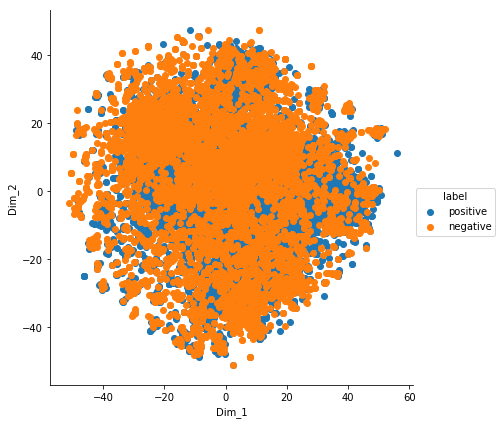

In [48]:
model = TSNE(n_components=2,random_state=0,perplexity=50,n_iter=1000)
amazon_BoW_tsne_data=model.fit_transform(text_vector)
amazon_BoW_tsne_data = np.vstack((amazon_BoW_tsne_data.T,amazon_polarity_labels)).T
amazon_BoW_tsne_data_DF=pd.DataFrame(data=amazon_BoW_tsne_data,columns=("Dim_1","Dim_2","label"))
sn.FacetGrid(amazon_BoW_tsne_data_DF,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

Observations :
1. Apply TSNE on BoW with Perplexity as 50 and Iterations as 1000
2. We are not able to make any observation at this point because most of the Negative reviews aare overlapped with Positive
   reviews.
3. Will try increasing Perplexity and see if we get any fruitful observation or not.

In [49]:
standardized_data

<10000x4227 sparse matrix of type '<class 'numpy.float64'>'
	with 294670 stored elements in Compressed Sparse Row format>

In [50]:
standardized_data.shape

(10000, 4227)

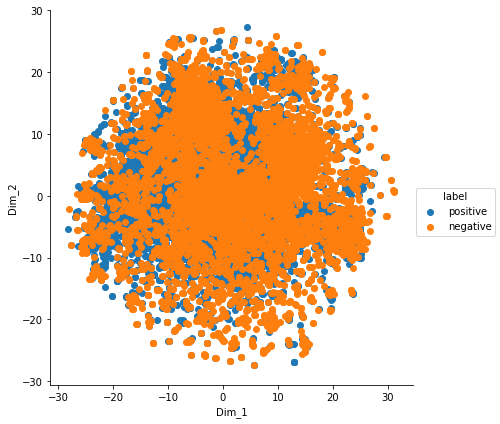

In [53]:
model = TSNE(n_components=2,random_state=0,perplexity=100,n_iter=1000)
amazon_BoW_tsne_data=model.fit_transform(text_vector)
amazon_BoW_tsne_data = np.vstack((amazon_BoW_tsne_data.T,amazon_polarity_labels)).T
amazon_BoW_tsne_data_DF=pd.DataFrame(data=amazon_BoW_tsne_data,columns=("Dim_1","Dim_2","label"))
sn.FacetGrid(amazon_BoW_tsne_data_DF,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

Observations :
1. Apply TSNE on BoW with Perplexity as 100 and Iterations as 1000
2. We are not able to make any observation at this point because most of the Negative reviews aare overlapped with Positive
   reviews.
3. The Positive and negative are not very well seperated and hence we cannot draw hyperplane to seperate between the reviews.

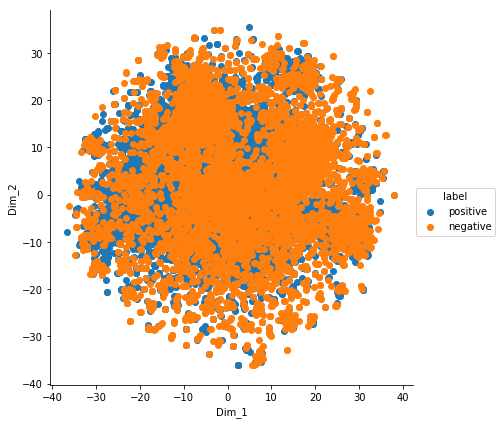

In [54]:
model = TSNE(n_components=2,random_state=0,perplexity=100,n_iter=5000)
amazon_BoW_tsne_data=model.fit_transform(text_vector)
amazon_BoW_tsne_data = np.vstack((amazon_BoW_tsne_data.T,amazon_polarity_labels)).T
amazon_BoW_tsne_data_DF=pd.DataFrame(data=amazon_BoW_tsne_data,columns=("Dim_1","Dim_2","label"))
sn.FacetGrid(amazon_BoW_tsne_data_DF,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

Observations :
1. Apply TSNE on BoW with Perplexity as 100 and Iterations as 5000
2. We are not able to make any observation at this point because most of the Negative reviews aare overlapped with Positive
   reviews.
3. The Positive and negative are not very well seperated and hence we cannot draw hyperplane to seperate between the reviews.
4. This is somewhat better than the previous 2 plots

In [55]:
final_text_vector_ngrams = CountVectorizer(min_df=5,ngram_range=(1,2)).fit_transform(total_data_10K['Cleaned_text'].values)

Observations : 
1. Use n-grams technique to convert text to vector and then apply TSNE.
2. Here used bi-gram technique on 10K Cleaned data and fit transform.
3. The result is Sparse matrix.

In [56]:
final_text_vector_ngrams

<10000x12911 sparse matrix of type '<class 'numpy.int64'>'
	with 389679 stored elements in Compressed Sparse Row format>

In [57]:
final_text_vector_ngrams.get_shape()

(10000, 12911)

In [58]:
standardized_data_ngrams=StandardScaler(with_mean=False).fit_transform(final_text_vector_ngrams)
truncate_svd=TruncatedSVD(n_components=100,random_state=0)
text_vector_ngrams=truncate_svd.fit_transform(standardized_data_ngrams)

Observations : 
1. Standarized the data using "StandardScaler" and fit transform.
2. Used Truncated SVD with 100 components & fit tranform to get (10000, 100) datapoints.

In [59]:
text_vector_ngrams

array([[ 1.92105252, -0.34935326, -0.11553876, ...,  0.22223492,
        -0.22360811, -0.01577984],
       [ 1.49965468,  0.07092202,  0.37913348, ...,  0.22023194,
        -0.04906888,  0.11131133],
       [ 3.05366717, -2.94445799,  0.55980354, ..., -0.64659271,
         0.99529125,  1.41757633],
       ..., 
       [ 5.95469809, -0.28851767,  0.27490036, ..., -0.48390421,
         0.99142262, -0.63907964],
       [ 6.82699686, -1.34714353, -0.56942432, ..., -0.57898732,
        -0.96603483,  0.09587301],
       [ 4.33822007, -0.04413786, -0.36217179, ...,  0.24390237,
         1.38875665,  1.90672131]])

In [60]:
text_vector_ngrams.shape

(10000, 100)

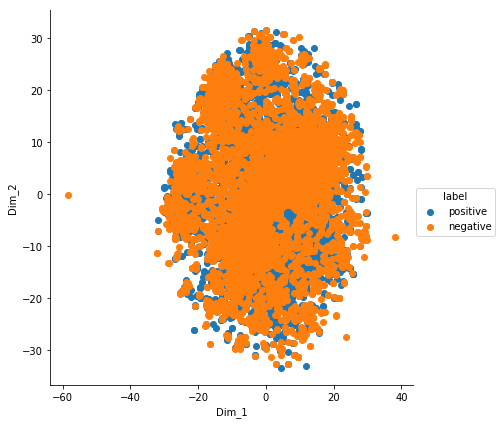

In [61]:
model = TSNE(n_components=2,random_state=0,perplexity=100,n_iter=1000)
amazon_BoW_tsne_data=model.fit_transform(text_vector_ngrams)
amazon_BoW_tsne_data = np.vstack((amazon_BoW_tsne_data.T,amazon_polarity_labels)).T
amazon_BoW_tsne_data_DF=pd.DataFrame(data=amazon_BoW_tsne_data,columns=("Dim_1","Dim_2","label"))
sn.FacetGrid(amazon_BoW_tsne_data_DF,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

Observations :
1. Apply TSNE on Bi-grams with Perplexity as 100 and Iterations as 5000
2. We are not able to make any observation at this point because most of the Negative reviews aare overlapped with Positive
   reviews.
3. The Positive and negative are not very well seperated and hence we cannot draw hyperplane to seperate between the reviews.

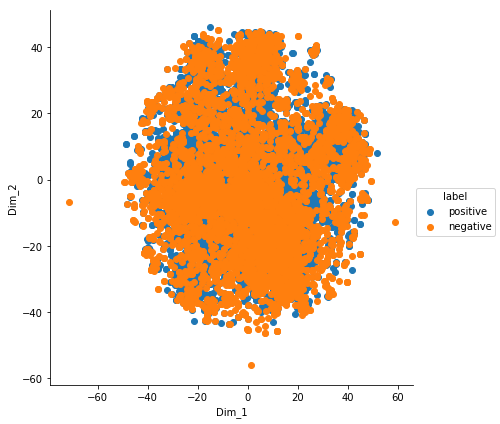

In [62]:
model = TSNE(n_components=2,random_state=0,perplexity=50,n_iter=1000)
amazon_BoW_tsne_data=model.fit_transform(text_vector_ngrams)
amazon_BoW_tsne_data = np.vstack((amazon_BoW_tsne_data.T,amazon_polarity_labels)).T
amazon_BoW_tsne_data_DF=pd.DataFrame(data=amazon_BoW_tsne_data,columns=("Dim_1","Dim_2","label"))
sn.FacetGrid(amazon_BoW_tsne_data_DF,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

Observations :
1. Apply TSNE on Bi-grams with Perplexity as 50 and Iterations as 5000
2. We are not able to make any observation at this point because most of the Negative reviews aare overlapped with Positive
   reviews.
3. The Positive and negative are not very well seperated and hence we cannot draw hyperplane to seperate between the reviews.
4. This is somewhat better than the previous plot.

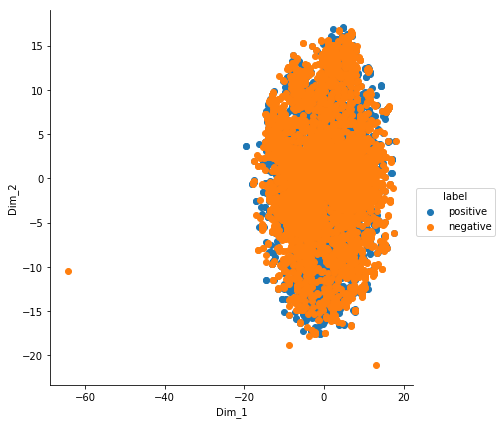

In [66]:
model = TSNE(n_components=2,random_state=0,perplexity=200,n_iter=5000)
amazon_BoW_tsne_data=model.fit_transform(text_vector_ngrams)
amazon_BoW_tsne_data = np.vstack((amazon_BoW_tsne_data.T,amazon_polarity_labels)).T
amazon_BoW_tsne_data_DF=pd.DataFrame(data=amazon_BoW_tsne_data,columns=("Dim_1","Dim_2","label"))
sn.FacetGrid(amazon_BoW_tsne_data_DF,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

Observations :
1. Apply TSNE on BoW with Perplexity as 200 and Iterations as 5000
2. We are not able to make any observation at this point because most of the Negative reviews aare overlapped with Positive
   reviews.
3. The Positive and negative are not very well seperated and hence we cannot draw hyperplane to seperate between the reviews.

SINCE WE DIDNT GET ANY PROPER WELL SEPERATED PLOTS WITH BOW & N-GRAM, we will Try with TF-IDF Technique and see if we get any well seperated plots.


In [67]:
final_text_vector_tfidf = TfidfVectorizer(min_df=5,ngram_range=(1,2)).fit_transform(total_data_10K['Cleaned_text'].values)

Observations : 
1. Used TF-IDF technique on 10K Datapoints to convert text to Vector.
2. The result is Sparse matrix.

In [68]:
final_text_vector_tfidf

<10000x12911 sparse matrix of type '<class 'numpy.float64'>'
	with 389679 stored elements in Compressed Sparse Row format>

In [69]:
final_text_vector_tfidf.get_shape()

(10000, 12911)

In [72]:
type(final_text_vector_tfidf)

scipy.sparse.csr.csr_matrix

In [73]:
standardized_data_tfidf=StandardScaler(with_mean=False).fit_transform(final_text_vector_tfidf)
truncate_svd=TruncatedSVD(n_components=final_text_vector_tfidf.shape[1]-1,random_state=0)
text_vector_tfidf=truncate_svd.fit_transform(standardized_data_tfidf)

Observations :
1. Standardized the data and fit tranform.
2. Used Truncated SVD with one minus total number of features components.

In [78]:
text_vector_tfidf.shape

(10000, 10000)

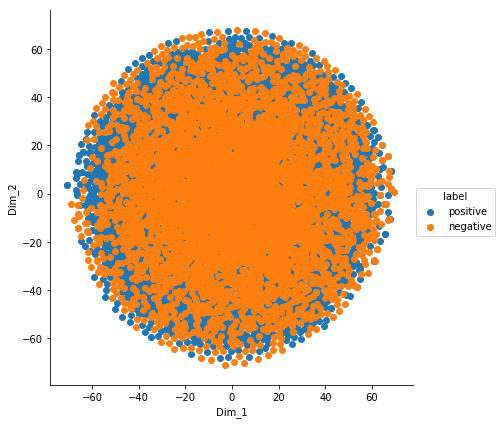

In [79]:
model = TSNE(n_components=2,random_state=0,perplexity=50,n_iter=1000)
amazon_tfidf_tsne_data=model.fit_transform(text_vector_tfidf)
amazon_tfidf_tsne_data = np.vstack((amazon_tfidf_tsne_data.T,amazon_polarity_labels)).T
amazon_tfidf_tsne_data_DF=pd.DataFrame(data=amazon_tfidf_tsne_data,columns=("Dim_1","Dim_2","label"))
sn.FacetGrid(amazon_tfidf_tsne_data_DF,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

Observations :
1. Apply TSNE on TF-IDF with Perplexity as 50 and Iterations as 1000.
2. This Plot is far much better and can see positive and negative reviews are bit seperated.
3. We are not able to make any observation at this point because most of the Negative reviews aare overlapped with Positive
   reviews.
4. The Positive and negative are not very well seperated and hence we cannot draw hyperplane to seperate between the reviews.

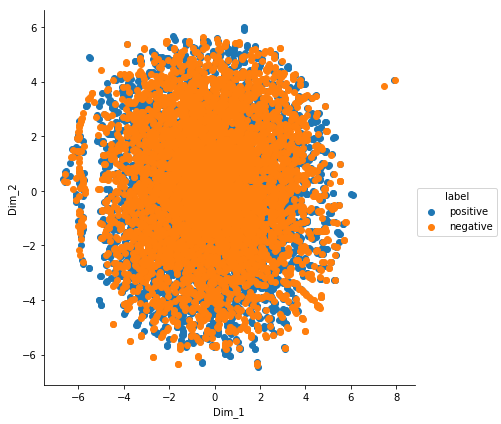

In [80]:
model = TSNE(n_components=2,random_state=0,perplexity=100,n_iter=1000)
amazon_tfidf_tsne_data=model.fit_transform(text_vector_tfidf)
amazon_tfidf_tsne_data = np.vstack((amazon_tfidf_tsne_data.T,amazon_polarity_labels)).T
amazon_tfidf_tsne_data_DF=pd.DataFrame(data=amazon_tfidf_tsne_data,columns=("Dim_1","Dim_2","label"))
sn.FacetGrid(amazon_tfidf_tsne_data_DF,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

Observations :
1. Apply TSNE on TF-IDF with Perplexity as 100 and Iterations as 1000.
2. We are not able to make any observation at this point because most of the Negative reviews aare overlapped with Positive
   reviews.
3. The Positive and negative are not very well seperated and hence we cannot draw hyperplane to seperate between the reviews.

In [81]:
tsvd_var_ratios=truncate_svd.explained_variance_ratio_

def select_n_components(var_ratio,goal_var : float) -> int :
    total_variance=0.0
    n_components=0
    
    for explained_variance in var_ratio:
        total_variance += explained_variance
        n_components+=1
        
        if total_variance >= goal_var:
            break
    return n_components

Observations :
1. selecting best n-components. Off topic. Not related to Assignment.

In [82]:
select_n_components(tsvd_var_ratios,0.95,

6723

In [83]:
tsvd_var_ratios

array([  3.53043089e-04,   8.30019192e-04,   7.66278882e-04, ...,
         5.47737450e-38,   1.03089424e-38,   1.35251979e-53])

In [84]:
final_text_vector.get_shape()

(10000, 4227)

In [24]:
i=0
list_of_sent=[]

for sent in total_data_10K['Cleaned_text'].values:
    list_of_sent.append(sent.split())

Observations :
1. Traverse 10K Cleaned Text data using FOR loop.
2. Split and append the text in "list_of_sent" array.

In [25]:
print(total_data_10K['Cleaned_text'].values[0])
print("******************************************")
print(list_of_sent[0])

tea similar market spice good earth origin hobe cinnamon orang ice tea prefer smooth charact full bodi nice balanc cinnamon clove orang subtl mean honest actual black tea flavor bit steamrol aromat realli like surpris know sugar tast like packag attract though recommend cut adhes band hold lid tri peel split leav white adhes residu pretti black tin
******************************************
['tea', 'similar', 'market', 'spice', 'good', 'earth', 'origin', 'hobe', 'cinnamon', 'orang', 'ice', 'tea', 'prefer', 'smooth', 'charact', 'full', 'bodi', 'nice', 'balanc', 'cinnamon', 'clove', 'orang', 'subtl', 'mean', 'honest', 'actual', 'black', 'tea', 'flavor', 'bit', 'steamrol', 'aromat', 'realli', 'like', 'surpris', 'know', 'sugar', 'tast', 'like', 'packag', 'attract', 'though', 'recommend', 'cut', 'adhes', 'band', 'hold', 'lid', 'tri', 'peel', 'split', 'leav', 'white', 'adhes', 'residu', 'pretti', 'black', 'tin']


In [26]:
print(total_data_10K['Cleaned_text'].values[1])
print("******************************************")
print(list_of_sent[1])

watch oprah learn chocol order onlin christma instead regular hot chocol wow absolut fantast easi make
******************************************
['watch', 'oprah', 'learn', 'chocol', 'order', 'onlin', 'christma', 'instead', 'regular', 'hot', 'chocol', 'wow', 'absolut', 'fantast', 'easi', 'make']


In [27]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

print(list_of_sent[0])

['tea', 'similar', 'market', 'spice', 'good', 'earth', 'origin', 'hobe', 'cinnamon', 'orang', 'ice', 'tea', 'prefer', 'smooth', 'charact', 'full', 'bodi', 'nice', 'balanc', 'cinnamon', 'clove', 'orang', 'subtl', 'mean', 'honest', 'actual', 'black', 'tea', 'flavor', 'bit', 'steamrol', 'aromat', 'realli', 'like', 'surpris', 'know', 'sugar', 'tast', 'like', 'packag', 'attract', 'though', 'recommend', 'cut', 'adhes', 'band', 'hold', 'lid', 'tri', 'peel', 'split', 'leav', 'white', 'adhes', 'residu', 'pretti', 'black', 'tin']


Display the 0th position Array.

In [28]:
w2v_model = Word2Vec(list_of_sent,min_count=5,size=50,workers=4)
w2v_words=list(w2v_model.wv.vocab)

Observations :
1. Since we didnt make any conlusion on Positive & Negative Reviews using BOW , N-grams & TF-IDF, we will go with
   the best technique call as "Word2Vec" that will understand the semantic meaning of the words.

In [29]:
print(len(w2v_words))
print(w2v_words[0:50])

4666
['tea', 'similar', 'market', 'spice', 'good', 'earth', 'origin', 'cinnamon', 'orang', 'ice', 'prefer', 'smooth', 'charact', 'full', 'bodi', 'nice', 'balanc', 'clove', 'subtl', 'mean', 'honest', 'actual', 'black', 'flavor', 'bit', 'aromat', 'realli', 'like', 'surpris', 'know', 'sugar', 'tast', 'packag', 'attract', 'though', 'recommend', 'cut', 'band', 'hold', 'lid', 'tri', 'peel', 'split', 'leav', 'white', 'residu', 'pretti', 'tin', 'watch', 'learn']


In [32]:
w2v_model.wv.most_similar('like')

[('aw', 0.9135560989379883),
 ('noth', 0.8834808468818665),
 ('bland', 0.8811092376708984),
 ('weird', 0.8803515434265137),
 ('horribl', 0.8796305656433105),
 ('kind', 0.8587315678596497),
 ('terribl', 0.8503766059875488),
 ('actual', 0.8499743938446045),
 ('textur', 0.847557544708252),
 ('good', 0.8420078754425049)]

Display Semantic meaning of work "Like"

In [34]:
sent_vectors=[];
for sent in tqdm(list_of_sent):
    sent_vec=np.zeros(50)
    cnt_words=0;
    for word in sent:
        if word in w2v_words:
            vec=w2v_model.wv[word]
            sent_vec+=vec
            cnt_words+=1
    if cnt_words !=0:
        sent_vec/=cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|██████████| 10000/10000 [00:06<00:00, 1470.60it/s]


10000
50


Calculating Average Word2Vec from the "list_of_sent" array.

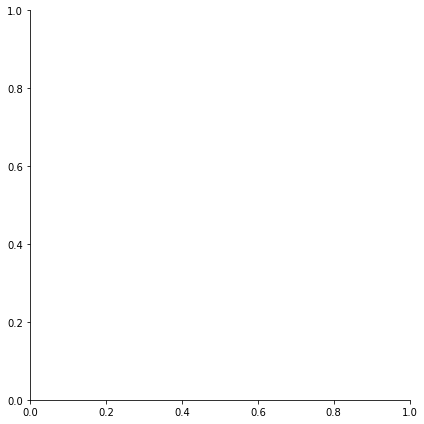

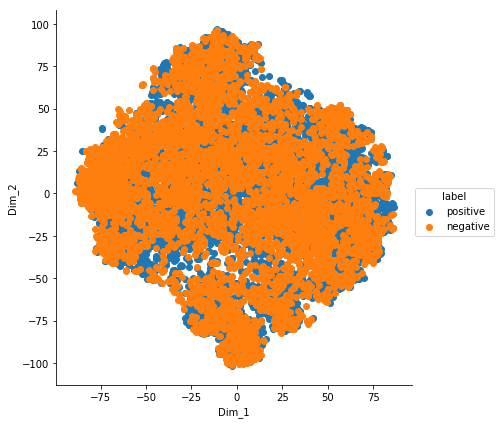

In [36]:
model = TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)
amazon_AvgW2v_tsne_data=model.fit_transform(sent_vectors)
amazon_AvgW2v_tsne_data = np.vstack((amazon_AvgW2v_tsne_data.T,amazon_polarity_labels)).T
amazon_AvgW2v_tsne_data_DF=pd.DataFrame(data=amazon_AvgW2v_tsne_data,columns=("Dim_1","Dim_2","label"))
sn.FacetGrid(amazon_AvgW2v_tsne_data_DF,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

Observations :
1. Apply TSNE on Average Word2 Vec with Perplexity as 50 and Iterations as 5000.
2. Most of the Negative Review are overlapped with Positive reviews. Hence we cannot make any conclusion at this point.
3. We will try with different perplexity and see we can get any fruitful outcome.

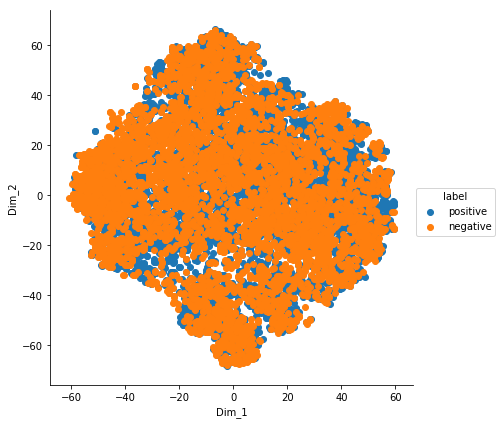

In [37]:
model = TSNE(n_components=2,random_state=0,perplexity=50,n_iter=1000)
amazon_AvgW2v_tsne_data=model.fit_transform(sent_vectors)
amazon_AvgW2v_tsne_data = np.vstack((amazon_AvgW2v_tsne_data.T,amazon_polarity_labels)).T
amazon_AvgW2v_tsne_data_DF=pd.DataFrame(data=amazon_AvgW2v_tsne_data,columns=("Dim_1","Dim_2","label"))
sn.FacetGrid(amazon_AvgW2v_tsne_data_DF,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

Observations :
1. Apply TSNE on Average Word2 Vec with Perplexity as 50 and Iterations as 1000.
2. Most of the Negative Review are overlapped with Positive reviews. Hence we cannot make any conclusion at this point.
3. We will try with different perplexity and see we can get any fruitful outcome.

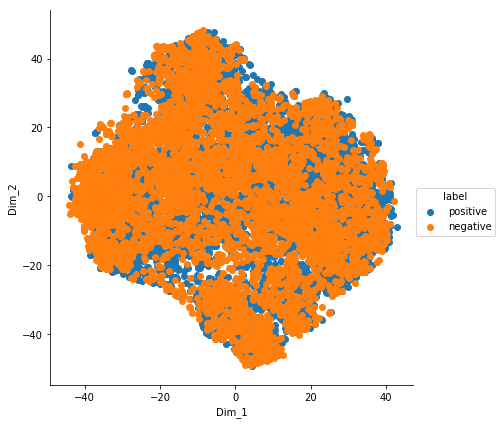

In [38]:
model = TSNE(n_components=2,random_state=0,perplexity=100,n_iter=1000)
amazon_AvgW2v_tsne_data=model.fit_transform(sent_vectors)
amazon_AvgW2v_tsne_data = np.vstack((amazon_AvgW2v_tsne_data.T,amazon_polarity_labels)).T
amazon_AvgW2v_tsne_data_DF=pd.DataFrame(data=amazon_AvgW2v_tsne_data,columns=("Dim_1","Dim_2","label"))
sn.FacetGrid(amazon_AvgW2v_tsne_data_DF,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

Observations :
1. Apply TSNE on Average Word2 Vec with Perplexity as 100 and Iterations as 1000.
2. Most of the Negative Review are overlapped with Positive reviews. Hence we cannot make any conclusion at this point.
3. We will try with different perplexity and see we can get any fruitful outcome.

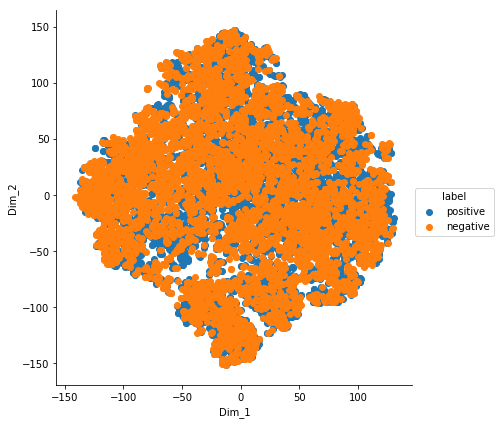

In [39]:
model = TSNE(n_components=2,random_state=0,perplexity=20,n_iter=5000)
amazon_AvgW2v_tsne_data=model.fit_transform(sent_vectors)
amazon_AvgW2v_tsne_data = np.vstack((amazon_AvgW2v_tsne_data.T,amazon_polarity_labels)).T
amazon_AvgW2v_tsne_data_DF=pd.DataFrame(data=amazon_AvgW2v_tsne_data,columns=("Dim_1","Dim_2","label"))
sn.FacetGrid(amazon_AvgW2v_tsne_data_DF,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

Observations :
1. Apply TSNE on Average Word2 Vec with Perplexity as 20 and Iterations as 5000.
2. Most of the Negative Review are overlapped with Positive reviews. Hence we cannot make any conclusion at this point.
3. We will try with different perplexity and see we can get any fruitful outcome.

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(total_data_10K['Cleaned_text'].values)

dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

Used TF-IDF Average Word2Vec and apply Fit transform on 10K Cleaned DataPoints.

In [48]:
tfidf_feature=model.get_feature_names()

tfidf_sent_vectors=[];
row=0;

for sent in tqdm(list_of_sent):
    sent_vec=np.zeros(50)
    weight_sum=0;
    for word in sent :
        if word in w2v_words:
            vec=w2v_model.wv[word]
            tf_idf=dictionary[word]*(sent.count(word)/len(sent))
            sent_vec+=(vec*tf_idf)
            weight_sum+=tf_idf
    
    if weight_sum!=0:
        sent_vec/=weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row+=1

100%|██████████| 10000/10000 [00:11<00:00, 881.09it/s]


Formulate the TFIDF Word2 Vec.

In [49]:
len(tfidf_sent_vectors)

10000

In [50]:
np.isnan(tfidf_sent_vectors)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

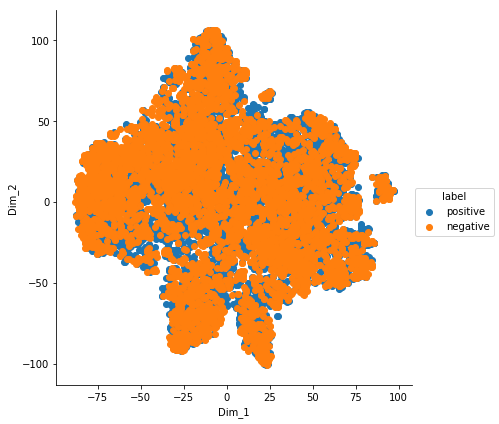

In [52]:
model = TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)
amazon_tfidfweightw2v_tsne_data=model.fit_transform(tfidf_sent_vectors)
amazon_tfidfweightw2v_tsne_data = np.vstack((amazon_tfidfweightw2v_tsne_data.T,amazon_polarity_labels)).T
amazon_tfidfweightw2v_tsne_data_DF=pd.DataFrame(data=amazon_tfidfweightw2v_tsne_data,columns=("Dim_1","Dim_2","label"))
sn.FacetGrid(amazon_tfidfweightw2v_tsne_data_DF,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

Observations :
1. Apply TSNE on TDIDF Word2 Vec with Perplexity as 50 and Iterations as 5000.
2. Most of the Negative Review are overlapped with Positive reviews. Hence we cannot make any conclusion at this point.
3. We will try with different perplexity and see we can get any fruitful outcome.

In [51]:
type(tfidf_sent_vectors)

list

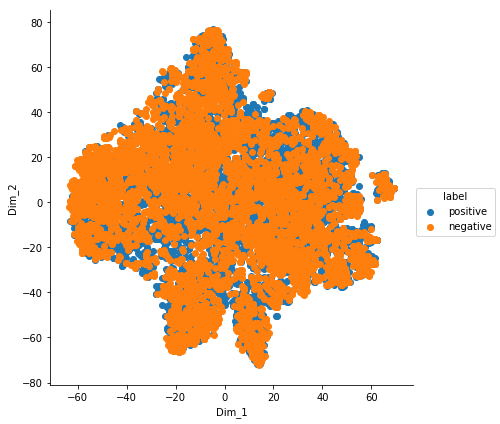

In [53]:
model = TSNE(n_components=2,random_state=0,perplexity=50,n_iter=1000)
amazon_tfidfweightw2v_tsne_data=model.fit_transform(tfidf_sent_vectors)
amazon_tfidfweightw2v_tsne_data = np.vstack((amazon_tfidfweightw2v_tsne_data.T,amazon_polarity_labels)).T
amazon_tfidfweightw2v_tsne_data_DF=pd.DataFrame(data=amazon_tfidfweightw2v_tsne_data,columns=("Dim_1","Dim_2","label"))
sn.FacetGrid(amazon_tfidfweightw2v_tsne_data_DF,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

Observations :
1. Apply TSNE on Average Word2 Vec with Perplexity as 50 and Iterations as 1000.
2. Most of the Negative Review are overlapped with Positive reviews. Hence we cannot make any conclusion at this point.
3. We will try with different perplexity and see we can get any fruitful outcome.

SINCE BY USING ALL THE POSSIBLE TECHNIQUE ,The Positive and negative are not very well seperated and hence we cannot draw hyperplane to seperate between the reviews.
